# Introdução

O dataset escolhido para a realização desse projeto trata-se das características de algumas músicas, para isso, ele apresenta diversas variáveis.
Visando a variável ''gênero musical'' como alvo, agrupamos 3 desses gêneros (Hip-hop, Rap e Jazz) que, a partir de modelos de classificação e a utilização das demais variáveis, classificaremos se uma música faz ou não parte desses gêneros.

In [200]:
#importa bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Minerando Dados e Características do Dataset

In [201]:
data = pd.read_csv("music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [202]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

Limpeza da base de dados

In [203]:
df=data[['artist_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence','music_genre']]
df.describe()
print(df.isnull().sum())

artist_name         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64


In [204]:
df=df.dropna(axis=0)
print(df.isnull().sum())

artist_name         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


Visualizando os tipos de variáveis

In [205]:
print(df.dtypes)

artist_name          object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object



Tirando variáveis qualitativas quais não conseguimos trabalhar


In [206]:
variaveis_irrelevantes=['artist_name','key','mode','tempo']
df=df.drop(variaveis_irrelevantes,axis=1)

In [207]:
print(df.dtypes)

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
music_genre          object
dtype: object


Visualizando quais generos musicais temos

In [208]:
print(df['music_genre'].value_counts())

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


Indexando os gêneros para facilitar o manuseio

In [209]:
dic={"Alternative":0,"Anime":1,"Blues":2,"Classical":3,"Country":4,"Electronic":5,"Hip-Hop":6,"Jazz":7,"Rap":8,"Rock":9}
df['music_genre']=df['music_genre'].map(dic)

Escolhendo os gêneros musicais que queremos trabalhar

In [210]:
df['Escolhidos']=0
df.loc[df['music_genre']==6,"Escolhidos"]=1
df.loc[df['music_genre']==7,"Escolhidos"]=1
df.loc[df['music_genre']==8,"Escolhidos"]=1

In [211]:
print(df['Escolhidos'].value_counts())
df.head(10)

0    35000
1    15000
Name: Escolhidos, dtype: int64


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,music_genre,Escolhidos
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,0.1150,-5.201,0.0748,0.759,5,0
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0.0300,0.531,5,0
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,0.0345,0.333,5,0
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,0.2390,0.270,5,0
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,0.0413,0.323,5,0
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,0.2160,-10.517,0.0412,0.614,5,0
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,0.3510,0.230,5,0
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0.0484,0.761,5,0
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0.2680,0.273,5,0
9,22.0,0.00934,0.578,204800.0,0.731,0.011200,0.1110,-7.091,0.1730,0.203,5,0


Definindo variavel target como pdSeries Y e as features como a lista X

In [212]:
X=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness', 'liveness','loudness','speechiness', 'valence']
Y=df['Escolhidos']

# Análise exploratória


In [213]:
import seaborn as sns

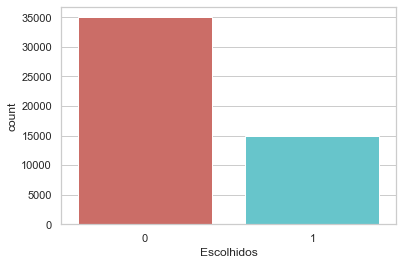

In [214]:
sns.countplot(x='Escolhidos',data=df,palette='hls')
plt.show()

<AxesSubplot:xlabel='Escolhidos', ylabel='danceability'>

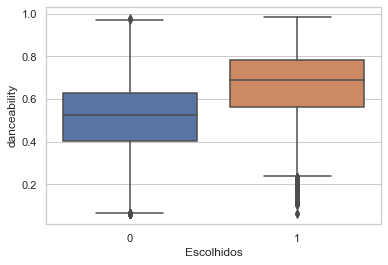

In [215]:
sns.boxplot(x=df['Escolhidos'],y=df['danceability'])


<AxesSubplot:xlabel='Escolhidos', ylabel='energy'>

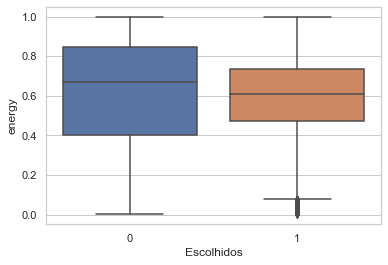

In [216]:
sns.boxplot(x=df['Escolhidos'],y=df['energy'])


# Modelo de Regressão Logistica
Na regressão logística, os valores de entrada (x) são combinados linearmente usando valores de coeficiente para prever um valor de saída (y).

Definindo função para auxiliar na criação do modelo usando a regressão logística do statsmodels, uma vez que este é mais fácil de trabalhar e analisar quais variaveis não são válidas.

In [217]:
def regress(Y,X):
    global X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(df[X], Y, test_size=0.3, random_state=0)
    model = sm.Logit(y_train,X_train)
    results = model.fit()
    
    return results

Eliminando variaveis auxiliares com P>|z| maior que α=10%.

In [218]:
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433300
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34990
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2907
Time:                        23:02:26   Log-Likelihood:                -15166.
converged:                       True   LL-Null:                       -21381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0460      0.001     41.526      0.000       0.044       0.048
acousticness        -0.4781      0.063     -7.588      0.000      -0.602      -0.355
danceability         2.9316      0.093     31.465      0.000       2.749       3.114
duration_ms      -1.668e-07   1.24e-07     -1.349      0.177   -4.09e-07    7.55e-08
energy              -6.2749      0.091    -68.825      0.000      -6.454      -6.096
instrumentalness     1.0723      0.057     18.659      0.000       0.960       1.185
liveness             0.0229      0.096      0.238      0.812      -0.166       0.212
loudness             0.2115      0.005     45.734      0.000       0.202       0.221
speechiness          8.7004      0.171     50.876      0.000       8.365       9.036
valence              0.1683      0.070      2.409      0.016       0.031       0.305
====================================================================================
"""

In [219]:
X=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness','loudness','speechiness', 'valence']
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433301
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34991
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2907
Time:                        23:02:27   Log-Likelihood:                -15166.
converged:                       True   LL-Null:                       -21381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0460      0.001     41.530      0.000       0.044       0.048
acousticness        -0.4771      0.063     -7.588      0.000      -0.600      -0.354
danceability         2.9304      0.093     31.502      0.000       2.748       3.113
duration_ms      -1.659e-07   1.24e-07     -1.342      0.179   -4.08e-07    7.63e-08
energy              -6.2691      0.088    -71.376      0.000      -6.441      -6.097
instrumentalness     1.0716      0.057     18.671      0.000       0.959       1.184
loudness             0.2114      0.005     46.041      0.000       0.202       0.220
speechiness          8.7053      0.170     51.287      0.000       8.373       9.038
valence              0.1681      0.070      2.406      0.016       0.031       0.305
====================================================================================
"""

In [220]:
X=['popularity','acousticness', 'danceability', 'energy','instrumentalness','loudness','speechiness', 'valence']
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433327
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34992
Method:                           MLE   Df Model:                            7
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2907
Time:                        23:02:27   Log-Likelihood:                -15166.
converged:                       True   LL-Null:                       -21381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0459      0.001     41.526      0.000       0.044       0.048
acousticness        -0.4818      0.063     -7.674      0.000      -0.605      -0.359
danceability         2.9258      0.093     31.476      0.000       2.744       3.108
energy              -6.3017      0.085    -74.570      0.000      -6.467      -6.136
instrumentalness     1.0668      0.057     18.626      0.000       0.955       1.179
loudness             0.2129      0.004     47.714      0.000       0.204       0.222
speechiness          8.7190      0.169     51.444      0.000       8.387       9.051
valence              0.1768      0.070      2.541      0.011       0.040       0.313
====================================================================================
"""

Criando um modelo final usando o sklearn, pois este pacote oferece mais ferramentas para o teste e análise de resultados.

In [221]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Prevendo resultados baseado nos dados de teste anteriormente definidos e mostrando sua precisão.

# Checando os resultados do modelo de regressão logística

In [222]:
y_pred = logreg.predict(X_test)
print('A precisão do modelo é de: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

A precisão do modelo é de: 81.92%


Tendo a matriz M dada a seguir, podemos saber quantos acertos temos ao somar sua diagonal principal e os erros ao somar a diagonal secundária.

In [223]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9663  838]
 [1874 2625]]


Aqui temos um breve resumo dos resultados do modelo.

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10501
           1       0.76      0.58      0.66      4499

    accuracy                           0.82     15000
   macro avg       0.80      0.75      0.77     15000
weighted avg       0.81      0.82      0.81     15000



# Curva Característica de Operação do Receptor:
Nessa curva coloca-se de forma gráfica o desempenho do modelo à medida que seu limiar de discriminação varia.
Portanto, quanto mais arcado e de concavidade para baixo, melhor validado está nosso modelo.

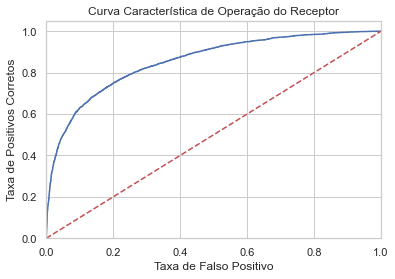

In [225]:
#ROC CURVE

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Positivos Corretos')
plt.title('Curva Característica de Operação do Receptor')
plt.show()

# Modelo de Decision Tree
O modelo 'Decision Tree' usa vários algoritmos para decidir dividir um nó em dois ou mais subnós. A criação de subnós aumenta a homogeneidade dos subnós que foram resultantes.

Cria um objeto da classe DecisionTreeClassifier usando os pârametros de treino.

In [226]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

Testa o classificador com o DataSet de teste

In [233]:
y_pred=clf.predict(X_test)

Checa a precisão do classificador.

In [234]:
print("Precisão: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Precisão: 79.34%


# Visualização gráfica da 'Decision Tree'
O código a seguir mostraria graficamente a árvore de decisões, porém, devido a erros com um módulo essencial para seu funcionamento, não conseguimos visualizar.

In [198]:
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = X,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('grafico_arvore_de_decisoes.png')
# Image(graph.create_png())

# Conclusão

A partir dos resultados obtidos tanto no modelo de regressão logística, quanto na ''decision tree'', pode-se concluir que; neste caso, o modelo de regressão logística foi mais eficiente, tendo em vista uma acurácia maior. Porém ambos os modelos são relevantes já que os valores da acurácia foram consideravelmente altos e com pequena diferença entre eles.